# Evaluation functions
The evaluation functions operate on a pair of images, one with ground truth objects and one with the segmented objects. We first define a "relevant set". We'll use a set of labeled floes from the Greenland Sea as an example.

In [68]:
%run ../scripts/evaluation_functions.py

In [59]:
import rasterio as rio
from rasterio.plot import reshape_as_image
import proplot as pplt
import skimage

dataloc = '../data/validation_images/labeled_floes/'
examp_img = '121-greenland_sea-20120406-terra-labeled_floes.png'
img1 = rio.open(dataloc + examp_img)
img2 = rio.open(dataloc + examp_img.replace('terra', 'aqua'))

img1 = reshape_as_image(img1.read())
img2 = reshape_as_image(img2.read())[::-1,:,:]

/opt/miniconda3/envs/ift_annals/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


/opt/miniconda3/envs/ift_annals/lib/python3.9/site-packages/numpy/ma/core.py:467: RuntimeWarning: invalid value encountered in cast
  fill_value = np.array(fill_value, copy=False, dtype=ndtype)


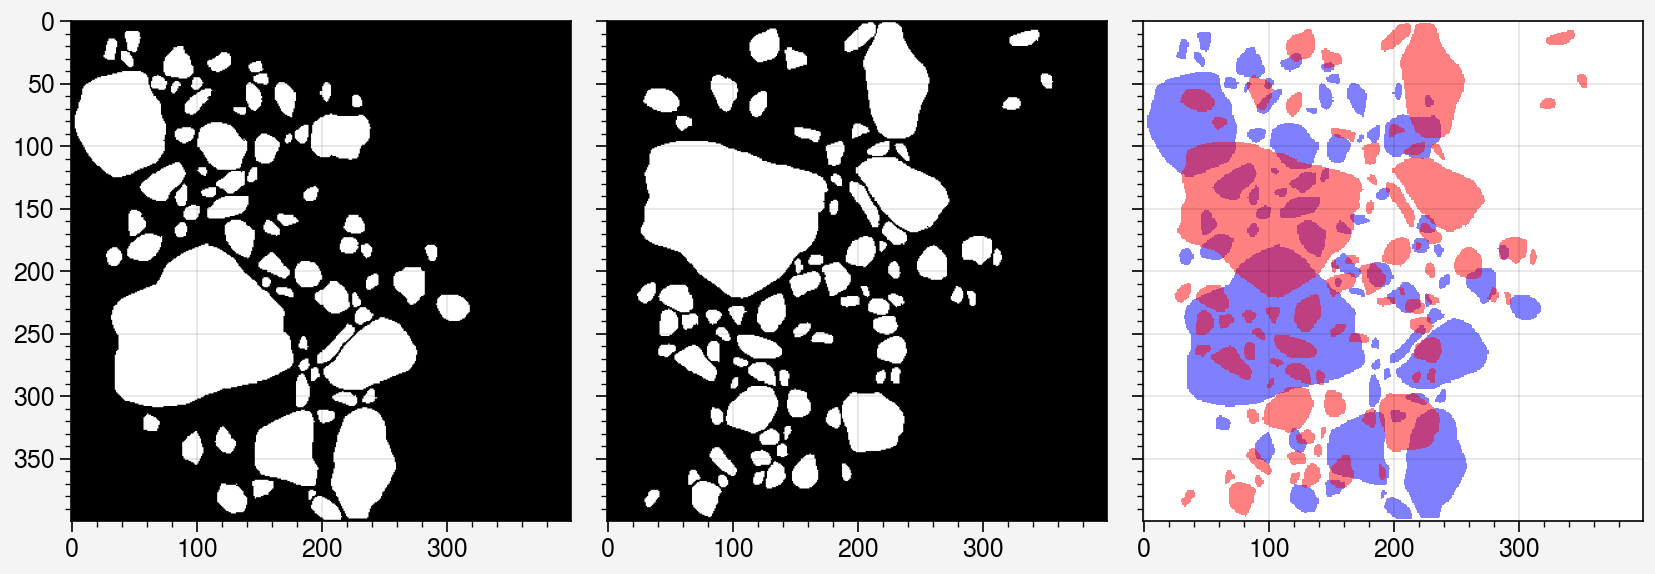

In [60]:
fig, ax = pplt.subplots(ncols=3)
ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(np.ma.masked_array(img1[:,:,0], img1[:,:,0]==0), c='b', alpha=0.5)
ax[2].imshow(np.ma.masked_array(img2[:,:,0], img2[:,:,0]==0), c='r', alpha=0.5)

We'll treat the second image as a segmentation result just for illustration purposes. We first need to label the images.

In [61]:
lb_img1 = skimage.measure.label(img1[:,:, 0])
lb_img2 = skimage.measure.label(img2[:,:,0])

In [76]:
%run ../scripts/evaluation_functions.py
df_measures = compute_metrics(lb_img1, lb_img2, return_type='unweighted')
df_measures

label_i                           41.249573
area_i                          5730.555556
area_j                           612.600000
overlap                          153.458974
area_relative_error               -3.471052
area_similarity_ratio              0.160558
normalized_area_diff_ratio         0.777080
undersegmentation_error            0.264334
oversegmentation_error             0.774891
segmentation_error                 0.851662
euclidean_distance                22.937808
hausdorff_distance                58.131510
modified_hausdorff_distance       26.461011
shape_dissimilarity                5.020833
directed_boundary_dice_score       0.165591
n                                 45.000000
dtype: float64

In [77]:
compute_metrics(lb_img1, lb_img2, return_type='weighted')

label_i                            40.653848
area_i                          12005.936258
area_j                            232.833764
overlap                           207.605018
area_relative_error                 0.842757
area_similarity_ratio               0.028231
normalized_area_diff_ratio          0.949946
undersegmentation_error             0.046539
oversegmentation_error              0.973198
segmentation_error                  0.955621
euclidean_distance                 35.609873
hausdorff_distance                 96.385681
modified_hausdorff_distance        45.146242
shape_dissimilarity                 1.103640
directed_boundary_dice_score        0.011386
n                                  45.000000
dtype: float64

In [82]:
import sklearn
error, precision, recall = skimage.metrics.adapted_rand_error(lb_img1, lb_img2)
splits, merges = skimage.metrics.variation_of_information(lb_img1, lb_img2)
splits, merges

(1.4087041712407433, 1.5482432832100737)

In [63]:
df_measures_unwtd = df_measures.groupby('label_i').mean()
df_measures_unwtd['n'] = df_measures.groupby('label_i').count()['label_j']

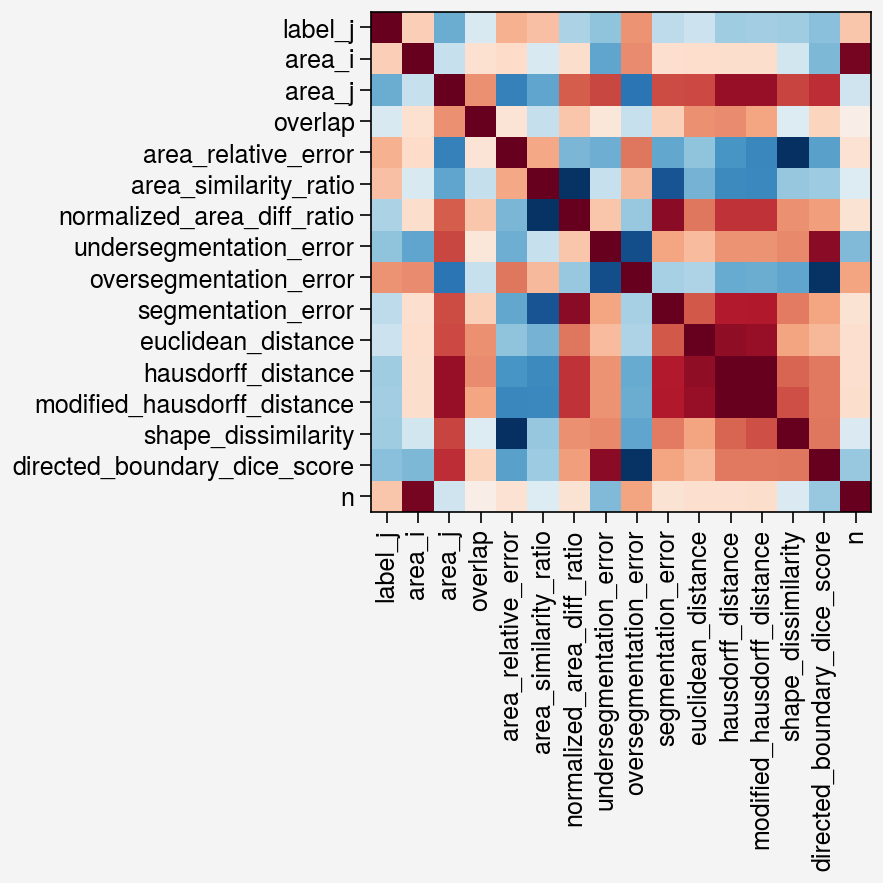

In [65]:
fig, ax = pplt.subplots()
ax.heatmap(df_measures_unwtd.corr())
ax.format(xrotation=90, xreverse=False, yreverse=True)